# CPEG 585 – Assignments 3,4 & 5

## Assignment 3

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


### Canny Edge Detection

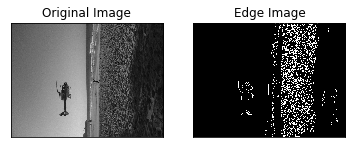

In [3]:
img = cv2.imread('img_0282.jpg',0)
edges = cv2.Canny(img,50,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

### Harris Corner Detection

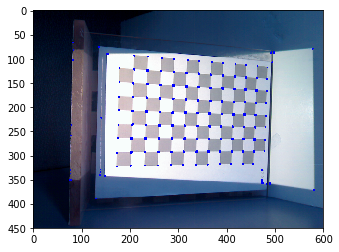

In [10]:
filename = 'calib1.png'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# find Harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
plt.imshow(img)
plt.show()

## Assignment 4

In the lecture, we studied the Linear Least Squares Optimization for estimating the model
parameters of a line to fit the given data. Do a second order polynomial fit to the following data using
Linear Least Squares Optimization. Program the code using Python.

\begin{equation*}
𝑓(\vec{x}; \vec{𝛽} ) = 𝛽_0 + 𝛽_1𝑥 + 𝛽_2𝑥^2 + ⋯
\end{equation*}

|x|y|
|---|---|
|1|-0.6|
|2|8.3|
|3|26|
|4|57|
|5|108|
|6|173|


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from http://mathworld.wolfram.com/LeastSquaresFittingPolynomial.html the following solution was obtained 

![function](NumberedEquation3.png)

In [3]:
def PolyFit(x,y,order):  #order will denote the tipe of curve: 1 = linear; > 1 Curve with n-1 inflections
    dimension = order+1
    A = np.zeros((dimension,dimension))
    for row in range(dimension):
        for col in range(dimension):
            A[row,col] = np.sum(x**(row+col))
    
    Z = np.zeros(dimension)
    for row in range(dimension):
        Z[row] = np.sum(y*x**row)
        ainv = np.linalg.inv(A)
    
    res = np.dot(ainv,Z)
    res = res.reshape((res.shape[0],1))
    
    yfitted = np.zeros((x.shape[0],1))
    for p in range(res.shape[0]):
        yfitted = yfitted + x**(p) * res[p,0]
        
    return yfitted

In [4]:
def plot(x,y,yfitted):
    area = 10
    colors =['black']
    plt.scatter(x, y, s=area, c=colors, alpha=0.5, linewidths=8)
    plt.title('Linear Least Squares Regression')
    plt.xlabel('x')
    plt.ylabel('y')
    #plot the fitted line

    line,=plt.plot(x, yfitted, '--', linewidth=2) #line plot
    line.set_color('red')
    plt.show()

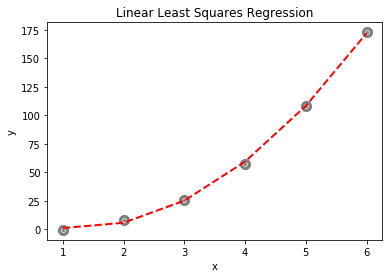

In [12]:
x = np.array([[1],[2],[3],[4],[5],[6]])
y = np.array([[-0.6],[8.3],[26],[57],[108],[173]])
yfitted = PolyFit(x,y,order=2)
plot(x,y,yfitted)

# Assigment 5


\begin{equation*}
Cost = \sum (I_1 - T(I_2))^2 = \sum {\left(\left(\begin{matrix}x_1 \\ y_1 \end{matrix}\right)  \left(\begin{matrix} a & b \\ -b & a \end{matrix}\right) \left(\begin{matrix}x_2 \\ y_2\end{matrix}\right) + \left(\begin{matrix}t_1 \\ t_2\end{matrix}\right)  \right) }^2 = \sum{\left(\begin{matrix}x_1-(ax_2 + by_2 + t_1) \\ y_1 -(-bx_2 +ay_2 +t_2\end{matrix}\right)}^2
\end{equation*}



\begin{equation*}
Cost = \sum{(x_1-(ax_2+by_2+t_1))^2 + (y_1 - (-bx_2 + ay_2 +t_2))^2}
\end{equation*}

### a) 

To find the optimal transformation that will align image 2 to image 1, take the partial
derivatives of the above cost with respect to a, b, t1 and t2 and set these to 0. Express the
four resulting equations in matrix form. 

$\begin{equation*}
\frac{\partial C}{\partial a} = 0 \\
\frac{\partial C}{\partial b} = 0 \\
\frac{\partial C}{\partial t_1} = 0 \\
\frac{\partial C}{\partial t_2} = 0 \\
\end{equation*}$

$
\begin{equation*}
\partial C / \partial a = -2x_2(x_1 - ax_2 - by_2 -t_1) - 2y_2(y_1 + bx_2 - ay_2 -t_2) = 0 \\
-2x_2x_1 + 2ax_2^2 + 2bx_2y_2 + 2x_2t_1 - 2y_1y_2 - 2bx_2y_2 + 2ay_2^2 + 2y_2t_2 = 0 \\
==> (2x_2^2 + 2y_2^2)a + 0 b + 2x_2t1 + 2y_2t_2 = 2x_1x_2 + 2y_1y_2
\end{equation*}$

$
\begin{equation*}
\partial C / \partial b = -2y_2(x_1 - ax_2 - by_2 -t_1) + 2x_2(y_1 + bx_2 - ay_2 -t_2) = 0 \\
-2y_2x_1 + 2y_2ax_2 + 2y_2^2b + 2y_2t_1 + 2x_2y_1 + 2x_2^2b - 2x_2y_2a - 2x_2t_2 = 0 \\
==>  (2y_2^2 + 2x_2^2) b + 2y_2 t_1 -  2x_2 t_2 = 2y_2x_1 - 2x_2y_1
\end{equation*}$

$
\begin{equation*}
\partial C / \partial t_1 = -2(x_1 - ax_2 - by_2 -t_1) = 0 \\
-2x_1 + 2ax_2 + 2by_2 + 2t_1 = 0 \\
==> 2x_2a + 2y_2 b + 2t_1 = 2x_1
\end{equation*}$

$
\begin{equation*}
\partial C / \partial t_2 = -2(y_1 + bx_2 - ay_2 -t_2) = 0 \\
-2y_1 - 2bx_2 + 2y_2a + 2t_2 = 0 \\
==> 2y_2a - 2x_2b +2t_2 = 2y_1
\end{equation*}$

\begin{equation*}
\sum \left( \begin{matrix} 
2x_2^2 + 2y_2^2 & 0 & 2x_2 & 2y_2 \\
0 & 2y_2^2 + 2x_2^2 & 2y_2 & -2x_2  \\
2x_2 & 2y_2 & 2 & 0 \\
2y_2 & -2x_2 & 0 & 2 \end{matrix} \right)
\left( \begin{matrix} a \\ b \\ t_1 \\t_2 \end{matrix} \right)
= \sum \left( \begin{matrix} 2x_1x_2 + 2y_1y_2 \\ 2y_2x_1 - 2x_2y_1 \\ 2x_1 \\ 2y_1 \end{matrix} \right)
\end{equation*}


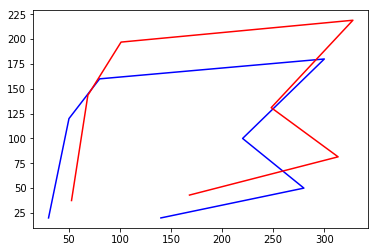

In [199]:
def Transform(shape1,params):
    a,b,t1,t2 = params
    shape2 = []
    for x,y in shape1:
        newpoint = (a*x + b*y + t1, -b*x + a*y + t2)
        shape2.append(newpoint)
    return shape2
from matplotlib import pyplot as plt

shape1 = [(20,30),(120,50),(160,80),(180,300),(100,220),(50,280),(20,140)]
initparam = [1.05,0.05,15,22]
shape2 = Transform(shape1,initparam)
shape2[2] = (shape2[2][0] + 10, shape2[2][1] + 3)
plt.plot([y for x,y in shape1],[x for x,y in shape1],color='b')
plt.plot([y for x,y in shape2],[x for x,y in shape2],color='r')
plt.show()

In [200]:
def ShapeAlign(shape1,shape2):
    
    mat = np.zeros((4,4))
    mat[0,0] = sum([2*x**2 + 2*y**2 for x,y in shape2])
    mat[0,1] = 0
    mat[0,2] = sum([2*x for x,y in shape2])
    mat[0,3] = sum([2*y for x,y in shape2])
    mat[1,0] = 0
    mat[1,1] = sum([2*x**2 + 2*y**2 for x,y in shape2])
    mat[1,2] = sum([2*y for x,y in shape2])
    mat[1,3] = sum([-2*x for x,y in shape2])
    mat[2,0] = sum([2*x for x,y in shape2])
    mat[2,1] = sum([2*y for x,y in shape2])
    mat[2,2] = sum([2 for x,y in shape2])
    mat[2,3] = 0
    mat[3,0] = sum([2*y for x,y in shape2])
    mat[3,1] = sum([-2*x for x,y in shape2])
    mat[3,2] = 0
    mat[3,3] = sum([2 for x,y in shape2])
    
    x1 = [x for x,y in shape1]
    y1 = [y for x,y in shape1]
    x2 = [x for x,y in shape2]
    y2 = [y for x,y in shape2]

    res = np.zeros((4,1))
    res[0,0] = sum(np.multiply(x1,x2) + np.multiply(y1,y2))*2
    res[1,0] = sum(np.multiply(x1,y2) - np.multiply(x2,y1))*2
    res[2,0] = sum(x1)*2
    res[3,0] = sum(y1)*2

    return np.matmul(np.linalg.inv(mat),res)



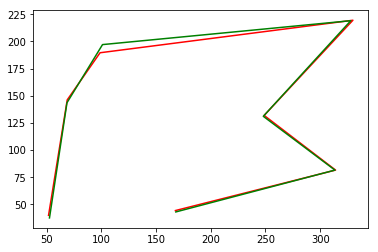

In [204]:
params = ShapeAlign(shape2,shape1)

shape3 = Transform(shape1,params)
plt.clf()
plt.plot([y for x,y in shape3],[x for x,y in shape3],color='r')
plt.plot([y for x,y in shape2],[x for x,y in shape2],color='g')
plt.show()